# ECBM E4040 - Assignment 1, Task 3: Dimensionality Reduction

This task is devoted to dimensionality reduction. How to map high-dimensional data into low-dimensional space is an interesting topic in the machine learning field. It is related to another hot topic -- unsupervised learning. In this section, you are going to learn two different methods for this dimensionality reduction.

* Principal Component Analysis (PCA)
* t-Distributed Stochastic Neighbor Embedding (t-SNE) 

In [106]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
from ecbm4040.cifar_utils import load_data

# Plot configurations
% matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
% load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

We will use the CIFAR-10 dataset.

In [107]:
# Load the raw CIFAR-10 data.
X_train, y_train, X_test, y_test = load_data()
X_train = X_train.reshape([50000,3,32,32]).transpose((0,2,3,1))
X_test = X_test.reshape([10000,3,32,32]).transpose((0,2,3,1))
# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

# Data organizations:
# Train data: 49000 samples from original train set: 1~49000
# Validation data: 1000 samples from original train set: 49000~50000
# Test data: 10000 samples from original test set: 1~10000
# Development data (for gradient check): 100 from the train set: 1~49000 #TODOTA is this 100 or 1000?
num_training = 49000
num_validation = 1000
num_dev = 100

X_val = X_train[-num_validation:]
y_val = y_train[-num_validation:]

mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

X_train = X_train[:num_training]
y_train = y_train[:num_training]

# Preprocessing: subtract the mean value across every dimension for training data
mean_image = np.mean(X_train, axis=0)

X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image
X_test = X_test.astype(np.float32) - mean_image
X_dev = X_dev.astype(np.float32) - mean_image

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('Development data shape:', X_dev.shape)
print('Development data shape', y_dev.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
(49000, 32, 32, 3) (1000, 32, 32, 3) (10000, 32, 32, 3) (100, 32, 32, 3)
Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
Development data shape: (100, 32, 32, 3)
Development data shape (100,)


## Part 1: Principal Component Analysis (PCA)

<span style="color:red"><strong>TODO</strong></span>: You have to complete the code in **./ecbm4040/features/pca.py**.

### Naive PCA

In [108]:
from ecbm4040.features.pca import pca_naive

X_patch = X_train[:,:,:,0]
X_patch = np.reshape(X_patch, (X_patch.shape[0], -1))

In [109]:
# Start PCA
K = 500
P, T = pca_naive(X_patch, K)

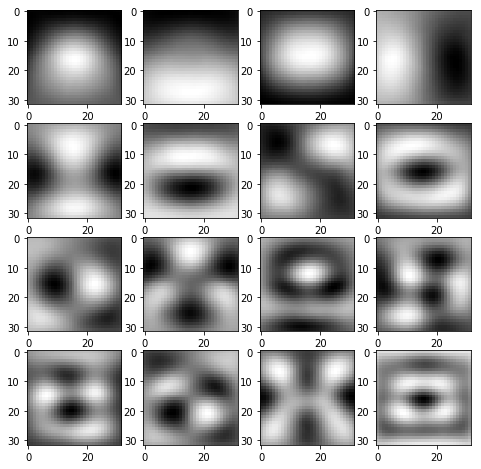

In [110]:
# TODO: Show principle components of P using a 4x4 subplot
# Visualize P
r = 4
f, axarr = plt.subplots(r, r, figsize=(8,8))
for i in range(r):
    for j in range(r):
        img = np.reshape(P[r*i+j], [32,32])
        axarr[i][j].imshow(img, cmap="gray")

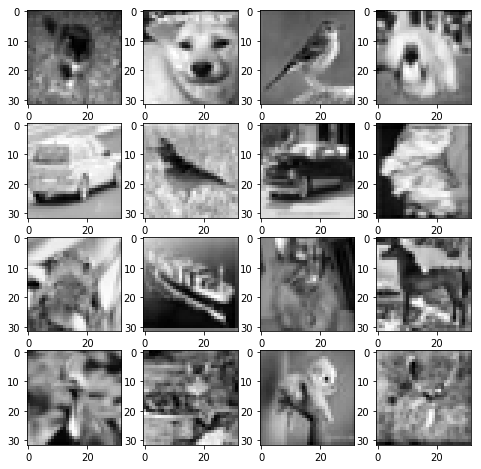

In [111]:
# Select a small set of images for test
num_training = 50000
num_pca = 16
mask = np.random.choice(num_training, num_pca, replace=False)
X_pca = X_train[mask,:,:,0]

# Visualize one channel of images 
r = 4
f, axarr = plt.subplots(r, r, figsize=(8,8))
for i in range(r):
    for j in range(r):
        img = X_pca[r*i+j]
        axarr[i][j].imshow(img, cmap="gray")

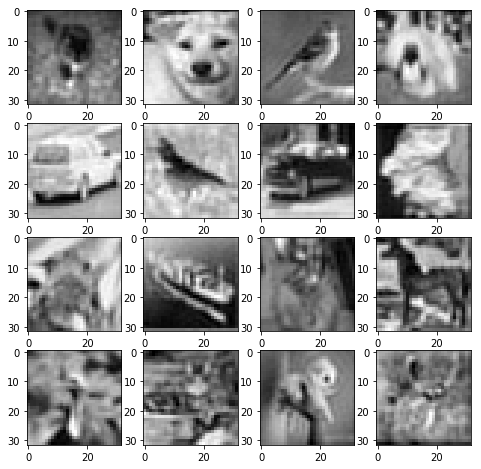

In [112]:
# TODO: Test your result
# Reduce dimension with P
X_features = []
for n in range(num_pca):
    img = X_pca[n]
    feature = np.dot(P, np.reshape(img, (-1,)))
    X_features.append(feature)

# Reconstruct image
X_recon = []
for n in range(num_pca):
    feature = X_features[n]
    img = np.reshape(np.dot(feature, P), (32,32))
    X_recon.append(img)

# Visualize results
r = 4
f, axarr = plt.subplots(r, r, figsize=(8,8))
for i in range(r):
    for j in range(r):
        img = X_recon[r*i+j]
        axarr[i][j].imshow(img, cmap="gray")

### PCA + Neural network

<span style="color:red"><strong>TODO</strong></span>: Use PCA to preprocess images before training a neural network: 

1. Do PCA preprocessing on each channel of the original image separately.
2. Stack PCA features from three channels into one vector, and use that vector as an input for MLP.
3. Train the MLP and show the results. 

In [113]:
from ecbm4040.train_funcs import train, test
from ecbm4040.classifiers.mlp import MLP

# TODO: pca preprocessing -> mlp classification



In [114]:
for i in range(3):
    
    #Loading data
    temp1 = X_train[:,:,:,i]
    temp2 = X_val[:,:,:,i]
    temp3 = X_test[:,:,:,i]
       
    #Reshaping it to 1024
    temp1_new = np.reshape(temp1, (temp1.shape[0], -1))
    temp2_new = np.reshape(temp2, (temp2.shape[0], -1))
    temp3_new = np.reshape(temp3, (temp3.shape[0], -1))
    
    #Finding P and T on train data
    K = 500
    P_1, T_1 = pca_naive(temp1_new, K)
    
    #Reducing dimensions
    redu_train = temp1_new.dot(P_1.T)
    redu_val = temp2_new.dot(P_1.T)
    redu_test = temp3_new.dot(P_1.T)
    
    if i==0:
        new_train = redu_train
        new_val = redu_val
        new_test = redu_test
    else:
        new_train = np.concatenate((new_train, redu_train), axis=1)
        new_val = np.concatenate((new_val, redu_val), axis=1)
        new_test = np.concatenate((new_test, redu_test), axis=1)

model = MLP(input_dim=1500, hidden_dims=[100, 50], num_classes=10, reg=0.1, weight_scale=1e-3)

num_epoch = 20
batch_size = 500
lr = 1e-2
verbose = True
train_acc_hist, val_acc_hist = train(model, new_train, y_train, new_val, y_val, 
                  num_epoch=num_epoch, batch_size=batch_size, learning_rate=lr, verbose=verbose)
test_acc = test(model, new_test, y_test)

number of batches for training: 98
5000/49000 loss: 2.305068870598775
10000/49000 loss: 2.3050538684709974
15000/49000 loss: 2.305043775712015
20000/49000 loss: 2.3050183921126037
25000/49000 loss: 2.3048051570470744
30000/49000 loss: 2.304495471102738
35000/49000 loss: 2.304250776164528
40000/49000 loss: 2.303360479016177
45000/49000 loss: 2.301328671788727
epoch 1: valid acc = 0.155, new learning rate = 0.0095
5000/49000 loss: 2.2931567128855
10000/49000 loss: 2.2601802443435743
15000/49000 loss: 2.2647204292868204
20000/49000 loss: 2.2176294044004354
25000/49000 loss: 2.2191165477197607
30000/49000 loss: 2.2358358036646884
35000/49000 loss: 2.2031675318387114
40000/49000 loss: 2.1927697014487944
45000/49000 loss: 2.18025820975272
epoch 2: valid acc = 0.155, new learning rate = 0.009025
5000/49000 loss: 2.198778971631801
10000/49000 loss: 2.201144589645828
15000/49000 loss: 2.2249779891174772
20000/49000 loss: 2.1865037178840816
25000/49000 loss: 2.172127476838646
30000/49000 loss: 2

<span style="color:red"><strong>TODO</strong></span>: Plot training, validation and test set accuracy.

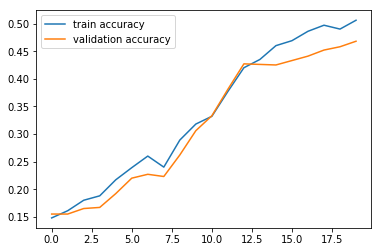

In [115]:
# TODO:
plt.plot(train_acc_hist, label="train accuracy")
plt.plot(val_acc_hist, label="validation accuracy")
plt.legend()
plt.show()

## Part 2: t-SNE (not graded)

t-SNE is is a machine learning algorithm for nonlinear dimensionality reduction developed by Geoffrey Hinton and Laurens van der Maaten. It is also a good way of visualizing high-dimensional data in 2D. We show its application for CIFAR10. Later it will be re-used in a CNN network. Experimenting with t-SNE can be fun. One thing to try is to visualize the output of each layer of MLP to observe the differences.

<p style="line-height: 1.2;">[1] Maaten, Laurens van der, and Geoffrey Hinton. "Visualizing data using t-SNE." Journal of Machine Learning Research 9.Nov (2008): 2579-2605.</p>
<p style="line-height: 1.2;">[2] Adaptive learning rate scheme by Jacobs https://www.willamette.edu/~gorr/classes/cs449/Momentum/deltabardelta.html</p>
<p style="line-height: 1.2;">[3] http://cs.stanford.edu/people/karpathy/cnnembed/</p>
<p style="line-height: 1.2;">[4] How to Use t-SNE Effectively, with examples.
 https://distill.pub/2016/misread-tsne</p>

In [99]:
from ecbm4040.features.tsne import tsne

#### tSNE of original data

In [116]:
random_select = np.random.choice(10000, 500, replace=False)
X = X_test[random_select,:,:,0].reshape(500,1024).astype('float')/255.0
tic = time.time()
Y = tsne(X, low_dim=2, perplexity=30.0)
print("it takes {} seconds".format(time.time()-tic))

2.467656515611847
The 100 th loop cost: 14.357474886814664, computation time: 1.4533419609069824
The 200 th loop cost: 1.1301735864031244, computation time: 2.7767341136932373
The 300 th loop cost: 1.1257825728669493, computation time: 4.072489023208618
The 400 th loop cost: 1.125704576302128, computation time: 5.464792013168335
The 500 th loop cost: 1.1257040991583254, computation time: 7.190881013870239
The 600 th loop cost: 1.125704098059717, computation time: 9.192720174789429
The 700 th loop cost: 1.1257040980571131, computation time: 10.803049087524414
The 800 th loop cost: 1.1257040980571018, computation time: 12.474305152893066
The 900 th loop cost: 1.1257040980571014, computation time: 13.902190208435059
The 1000 th loop cost: 1.1257040980571011, computation time: 15.169788122177124
it takes 15.65247106552124 seconds


In [101]:
## visualize tSNE of original data
labels = y_test[random_select]
colors = np.random.rand(10,3)
color_labels = [colors[int(i)] for i in labels.tolist()]
plt.scatter(Y[:,0], Y[:,1], 20, color_labels)
plt.show()

#### tSNE of data after two hidden layers

In the visualization result, you should find that in comparison with the tSNE of original data where all data points mess up with each other, the tSNE of data after two-layer networks is shown as multiple clusters in a 2D panel.

In [103]:
# Define MLP model
model = MLP(input_dim=3072, hidden_dims=[100], num_classes=10, reg=0.1, weight_scale=1e-3)

num_epoch = 10
batch_size = 200
lr = 1e-3
verbose = False
train_acc_hist, val_acc_hist = train(model, X_train, y_train, X_val, y_val, 
                  num_epoch=num_epoch, batch_size=batch_size, learning_rate=lr, verbose=verbose)
test(model, X_test, y_test)

number of batches for training: 245
epoch 1: valid acc = 0.388, new learning rate = 0.00095
epoch 2: valid acc = 0.446, new learning rate = 0.0009025
epoch 3: valid acc = 0.455, new learning rate = 0.000857375
epoch 4: valid acc = 0.481, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.49, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.469, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.483, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.485, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.493, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.499, new learning rate = 0.0005987369392383785
test acc: 0.5066


0.5066

In [104]:
# run tSNE
X = X_test[random_select]
X = model.layers[0].feedforward(X)
X = model.layers[1].feedforward(X)
X_exp = np.exp(X)
X = X_exp / np.tile(np.sum(X_exp, axis=1, keepdims=True), 10)

tic = time.time()
Y = tsne(X, low_dim=2, perplexity=30.0)
print("it takes {} seconds".format(time.time()-tic))

0.19366975333199543
The 100 th loop cost: 11.211107523352313, computation time: 1.3204259872436523
The 200 th loop cost: 0.5137056315515943, computation time: 2.442854881286621
The 300 th loop cost: 0.49903189866372644, computation time: 3.5463297367095947
The 400 th loop cost: 0.49785496596665757, computation time: 4.666650772094727
The 500 th loop cost: 0.4977489661722771, computation time: 5.791608095169067
The 600 th loop cost: 0.4977307416787782, computation time: 6.945241689682007
The 700 th loop cost: 0.49772661259283774, computation time: 8.196003675460815
The 800 th loop cost: 0.49772559937815103, computation time: 9.302736759185791
The 900 th loop cost: 0.4977253413971573, computation time: 10.387666940689087
The 1000 th loop cost: 0.49772527452192167, computation time: 11.538652896881104
it takes 12.078083753585815 seconds


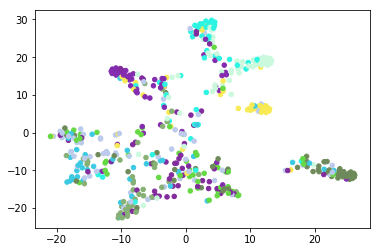

In [105]:
# visualize tSNE 2D representation of data after two hidden layers
labels = y_test[random_select]
colors = np.random.rand(10,3)
color_labels = [colors[int(i)] for i in labels.tolist()]
plt.scatter(Y[:,0], Y[:,1], 20, color_labels)
plt.show()